In [1]:
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
coins = pd.read_csv("coins.csv")
coins.head(10)

,reflectance,weight,denomination
0,24.226059,4.384837,1
1,24.322672,5.014980,1
2,23.527142,4.569030,1
3,26.765469,6.320783,1
4,22.457390,4.954992,1
5,22.912666,5.286136,1
6,23.095557,4.432129,1
7,26.447107,5.660208,1
8,25.152615,5.256971,1
9,25.137096,4.227505,1


<Axes: xlabel='reflectance', ylabel='weight'>

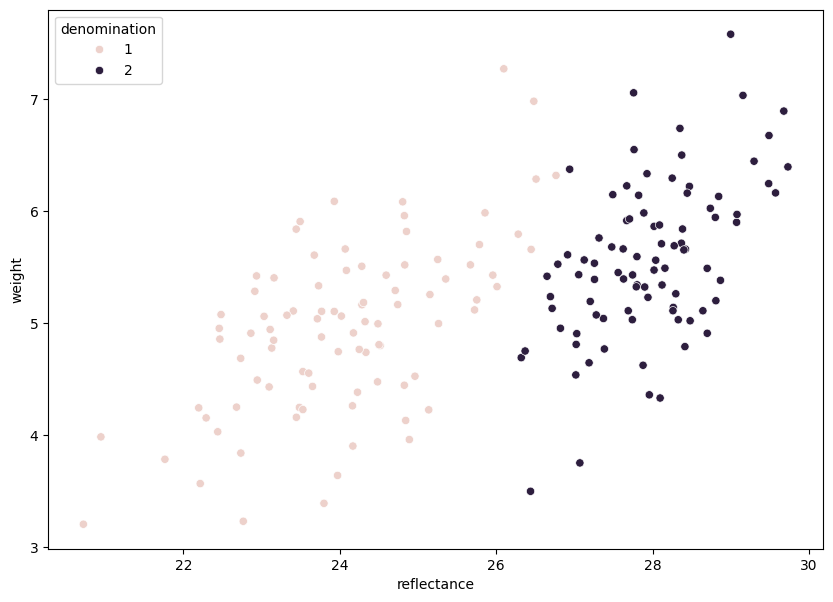

In [3]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [14]:
# test train split
X = coins[["reflectance","weight"]].to_numpy()
y = coins[["denomination"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
## Import your favourite classifier and train it using the X_train data and hte y_train labels

## make sure you instantiate your classifier and name it clf

## for example, if you are using perceptron, you would do the following - 

# -> from sklearn.linear_model import Perceptron
# -> clf = Perceptron(tol=1e-3, random_state=0)
# .... call fit , etc.


# implements artificial neural network
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(tol=1e-3, random_state=0)
clf.fit(X_train, np.ravel(y_train))

MLPClassifier(random_state=0, tol=0.001)

In [28]:
## test the accuracy of your model
clf.predict(X_test)
clf.predict(X_train)


array([2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1])

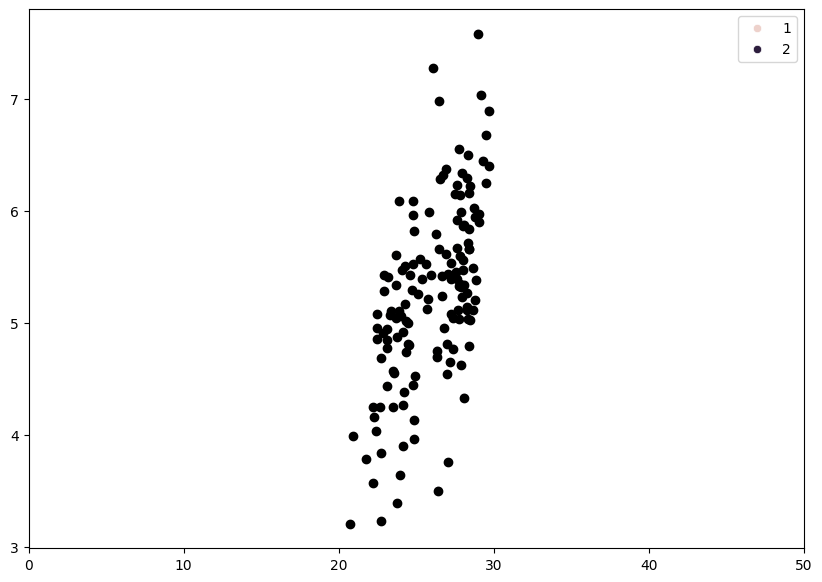

In [31]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
# hint: look at the ann example


sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=np.ravel(y_train))
plt.xlim(0, 50)
plt.scatter(X_train[:,0],X_train[:,1],color="black")
# # Plot the decision boundary
temp = np.linspace(0,25000,1000)
radius = np.linspace(-1,1,100)
from itertools import product
g = clf.predict(X_train)
db=pd.DataFrame({"temp":X_train[:,0],"radius":X_train[:,1],"label":list(map(np.argmax,g)) })
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.scatterplot(data=db,x="temp",y="radius",hue="label")
plt.scatter(X_train[:,0],X_train[:,1],color="black")
plt.xlim(0,5000)
plt.ylim(-1,1)

In [ ]:
## additional stuff you want to add 

In [ ]:
# dump your classifier into a pickle file
pickle.dump(clf, open("model.pickle","wb"))